In [264]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [164]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [165]:
df_train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [166]:
df_train.info()
df_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


(188318, 132)

In [167]:
df_test.info()
df_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125546 entries, 0 to 125545
Columns: 131 entries, id to cont14
dtypes: float64(14), int64(1), object(116)
memory usage: 125.5+ MB


(125546, 131)

In [168]:
df_train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [169]:
df_train.isnull().sum()

id        0
cat1      0
cat2      0
cat3      0
cat4      0
         ..
cont11    0
cont12    0
cont13    0
cont14    0
loss      0
Length: 132, dtype: int64

In [170]:
df_train.duplicated().sum()

0

## Categorical Value 

In [171]:
col_name = df_train.columns

In [173]:
for i in range(1,117):
    column = col_name[i]
    print(f'Column {column} has {len(df_train[column].unique())} values: {df_train[column].unique()}')

Column cat1 has 2 values: ['A' 'B']
Column cat2 has 2 values: ['B' 'A']
Column cat3 has 2 values: ['A' 'B']
Column cat4 has 2 values: ['B' 'A']
Column cat5 has 2 values: ['A' 'B']
Column cat6 has 2 values: ['A' 'B']
Column cat7 has 2 values: ['A' 'B']
Column cat8 has 2 values: ['A' 'B']
Column cat9 has 2 values: ['B' 'A']
Column cat10 has 2 values: ['A' 'B']
Column cat11 has 2 values: ['B' 'A']
Column cat12 has 2 values: ['A' 'B']
Column cat13 has 2 values: ['A' 'B']
Column cat14 has 2 values: ['A' 'B']
Column cat15 has 2 values: ['A' 'B']
Column cat16 has 2 values: ['A' 'B']
Column cat17 has 2 values: ['A' 'B']
Column cat18 has 2 values: ['A' 'B']
Column cat19 has 2 values: ['A' 'B']
Column cat20 has 2 values: ['A' 'B']
Column cat21 has 2 values: ['A' 'B']
Column cat22 has 2 values: ['A' 'B']
Column cat23 has 2 values: ['B' 'A']
Column cat24 has 2 values: ['A' 'B']
Column cat25 has 2 values: ['A' 'B']
Column cat26 has 2 values: ['A' 'B']
Column cat27 has 2 values: ['A' 'B']
Column cat

<ipython-input-174-c08839d3d907>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(nrows = 1, ncols = n_cols, figsize = (20,5), sharey = True)


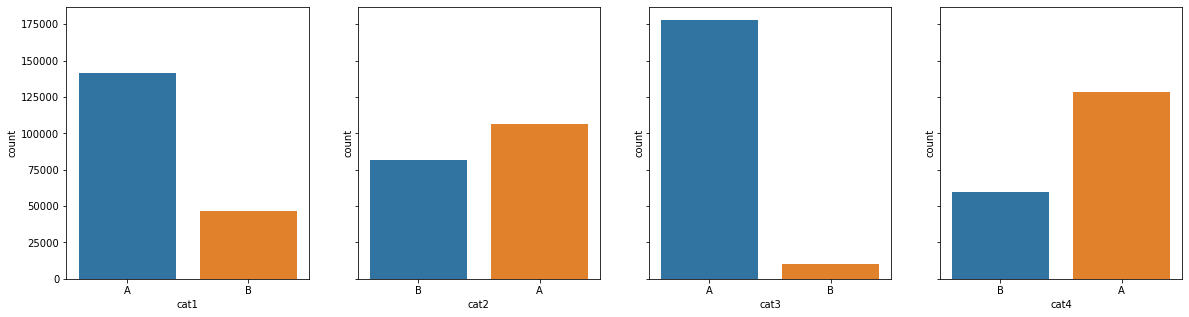

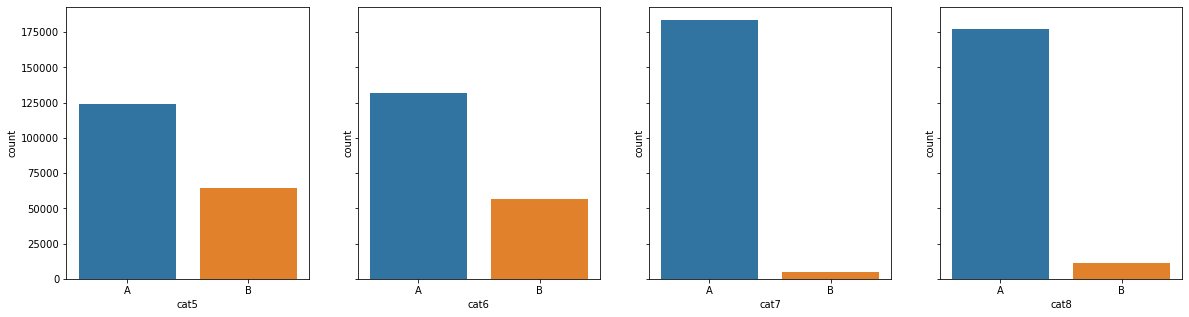

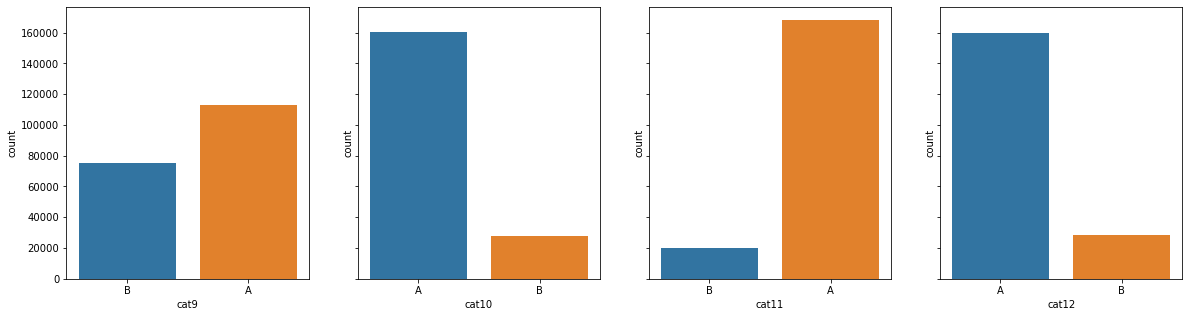

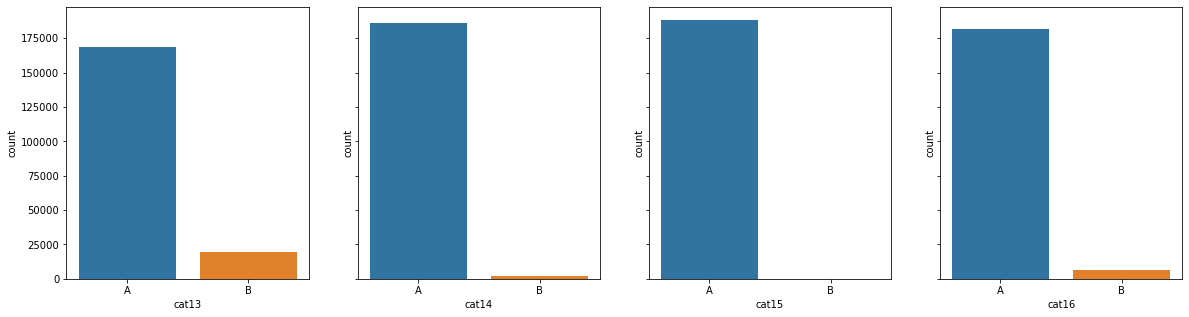

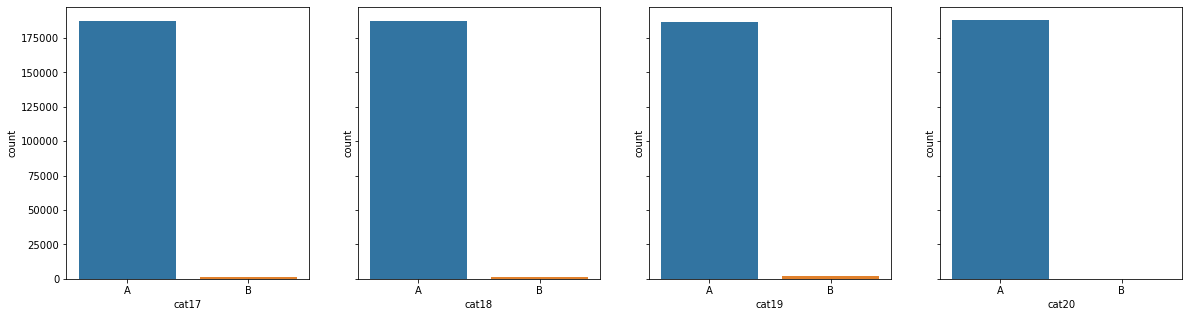

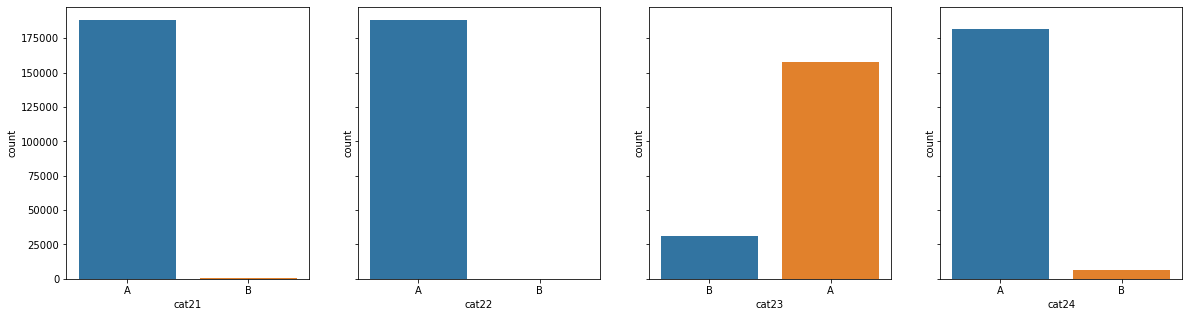

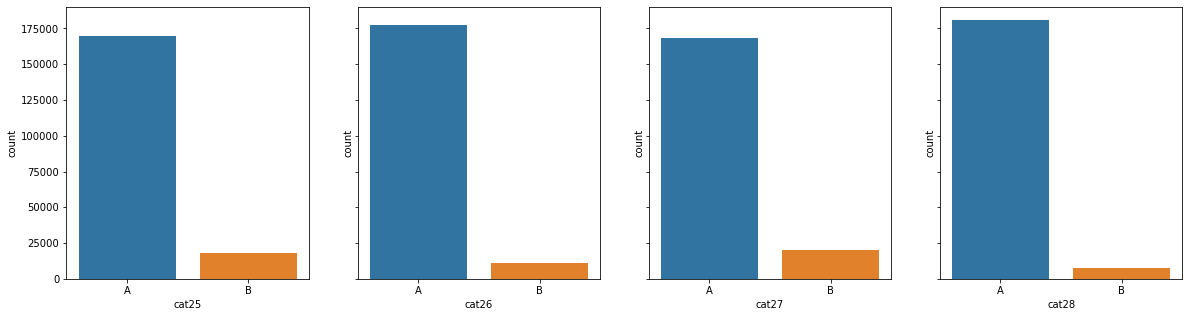

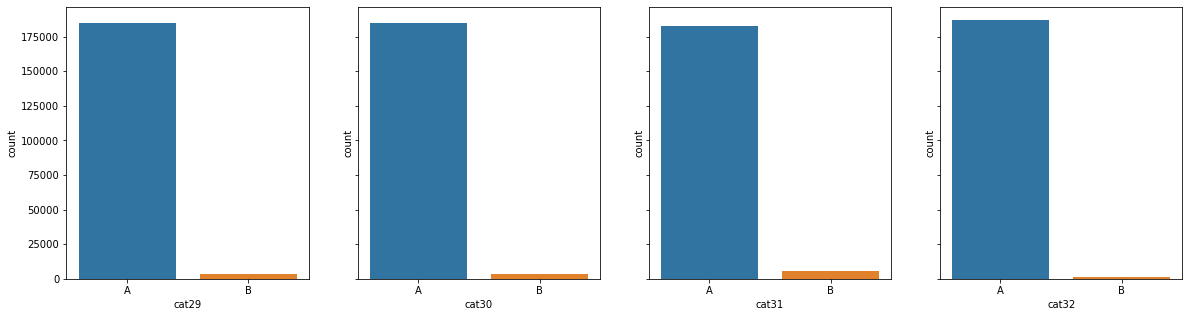

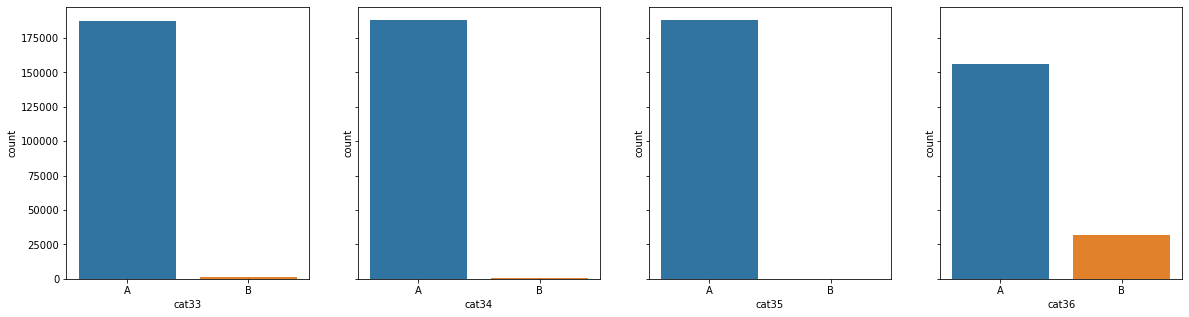

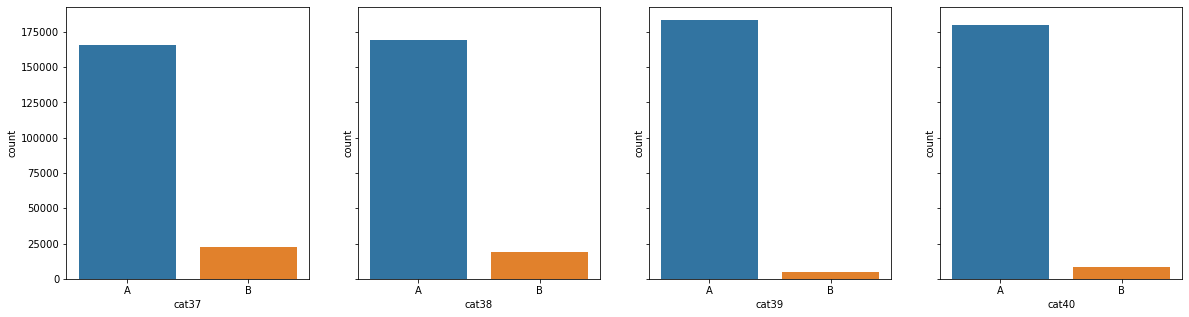

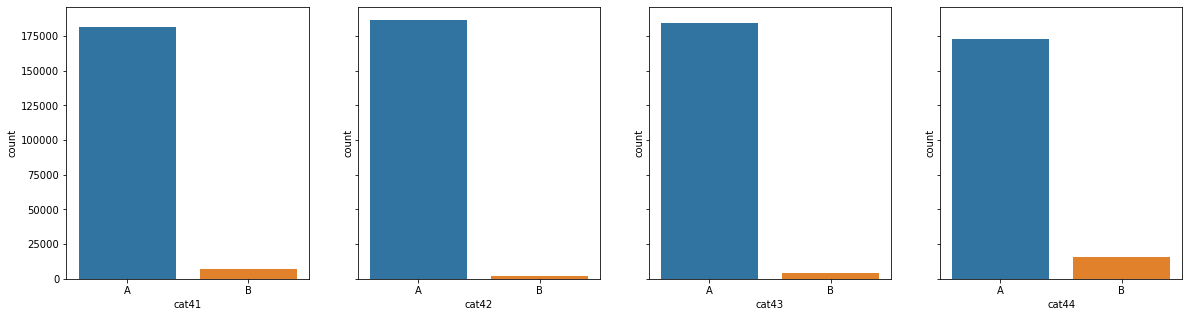

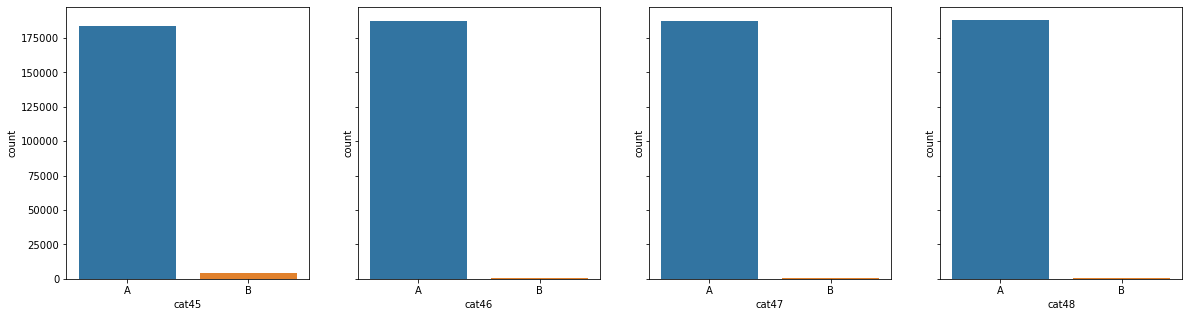

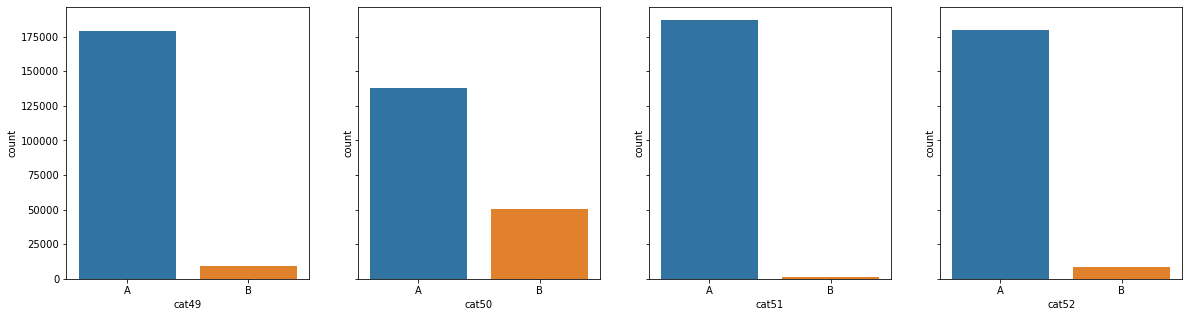

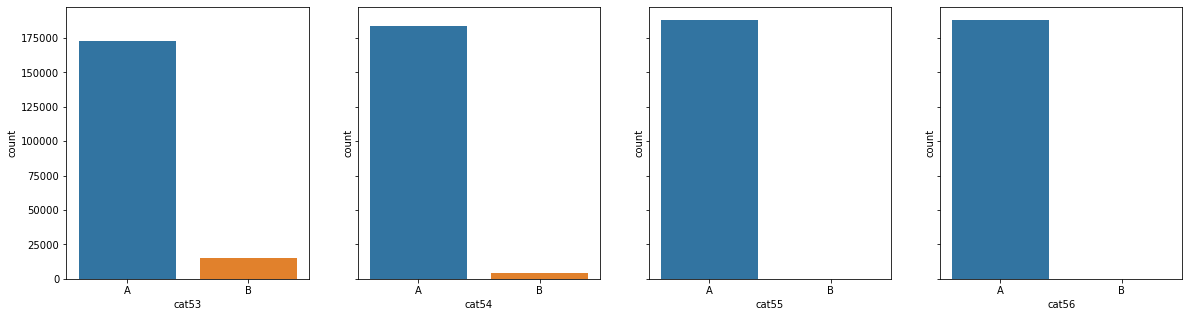

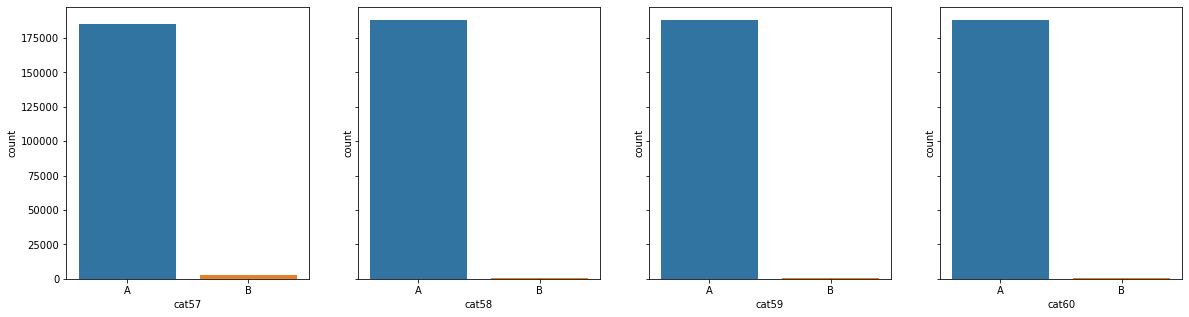

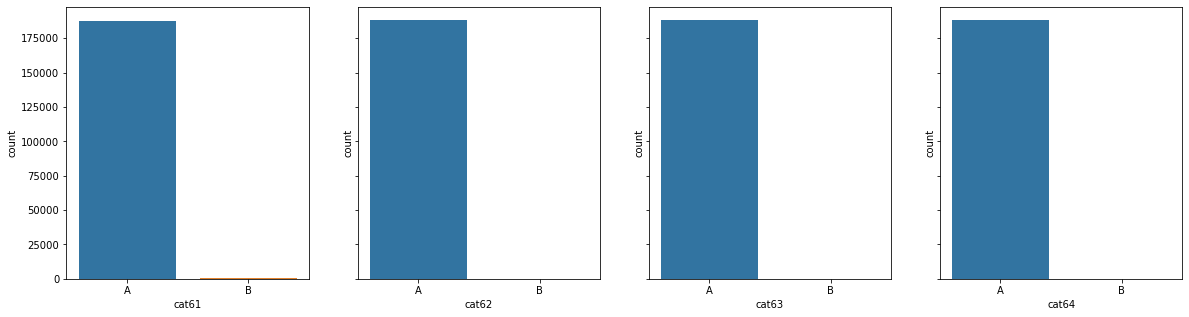

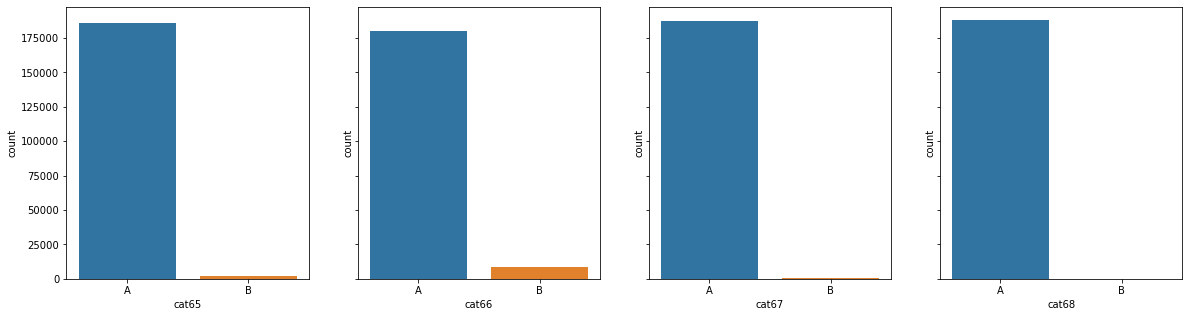

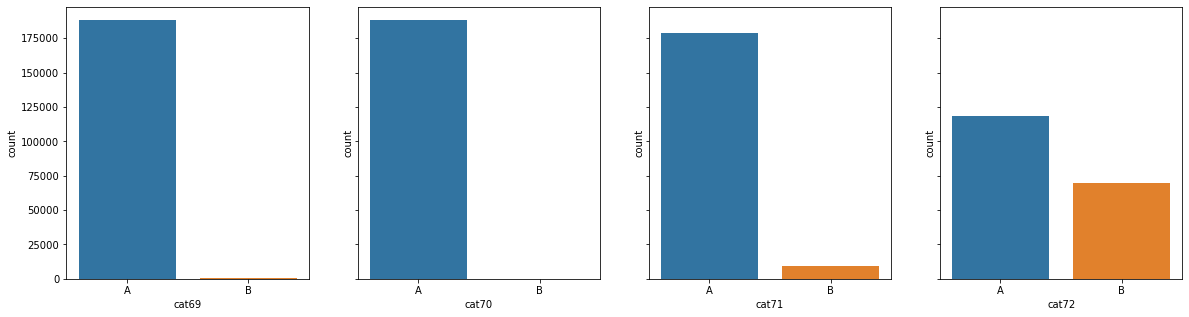

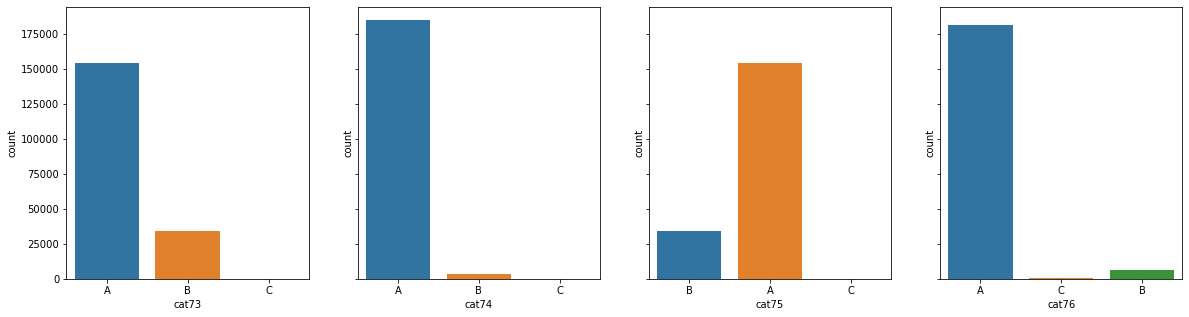

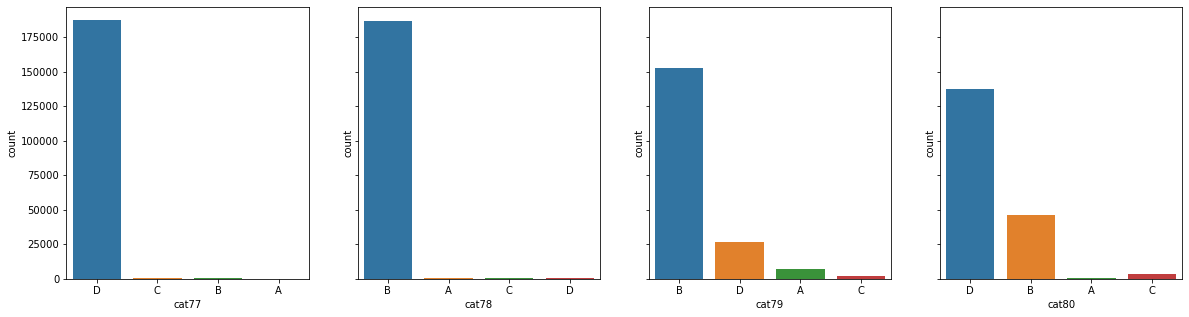

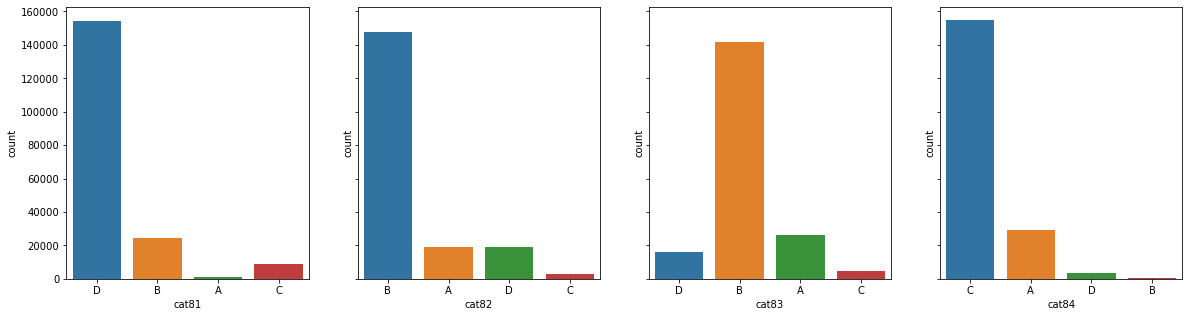

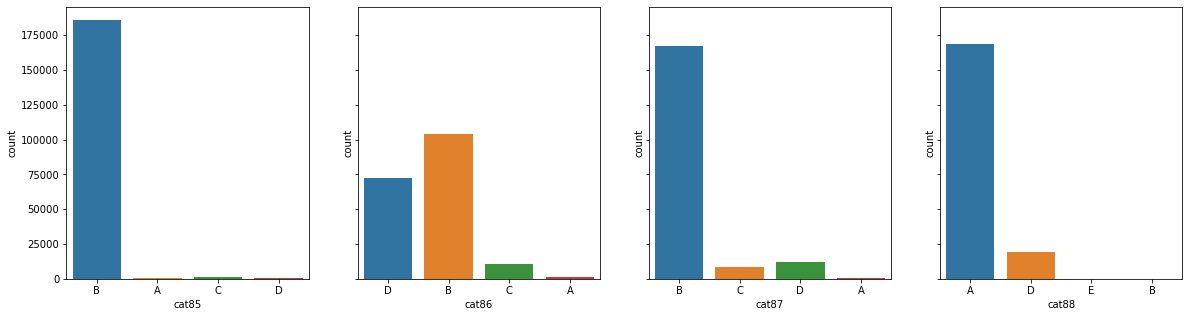

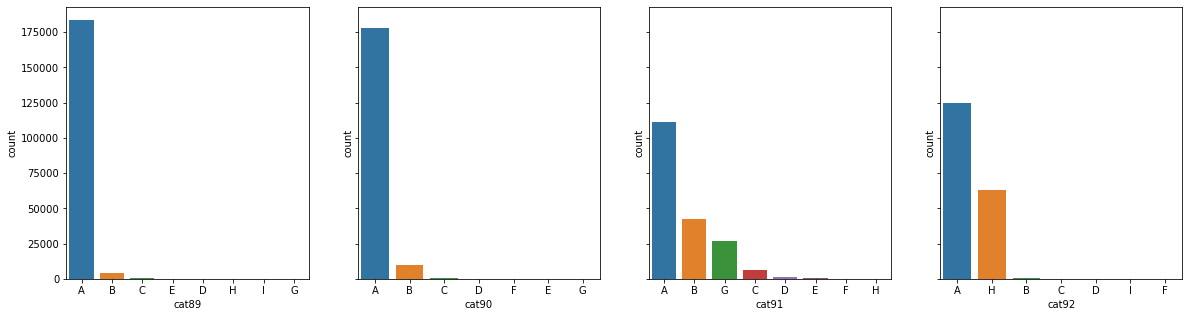

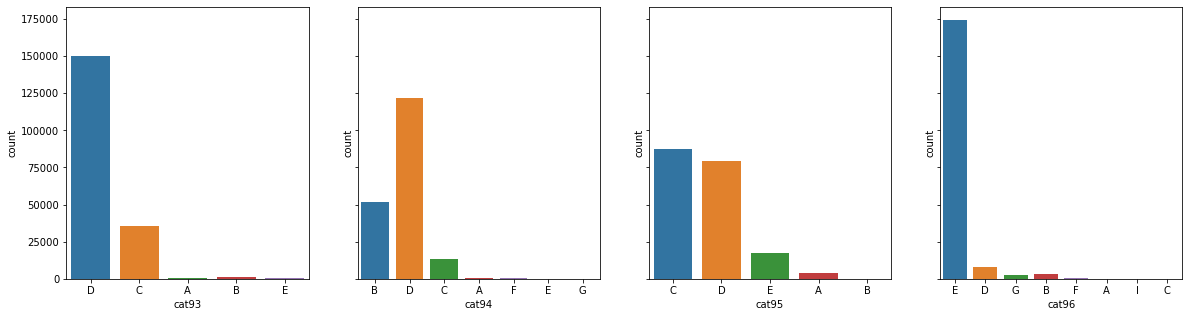

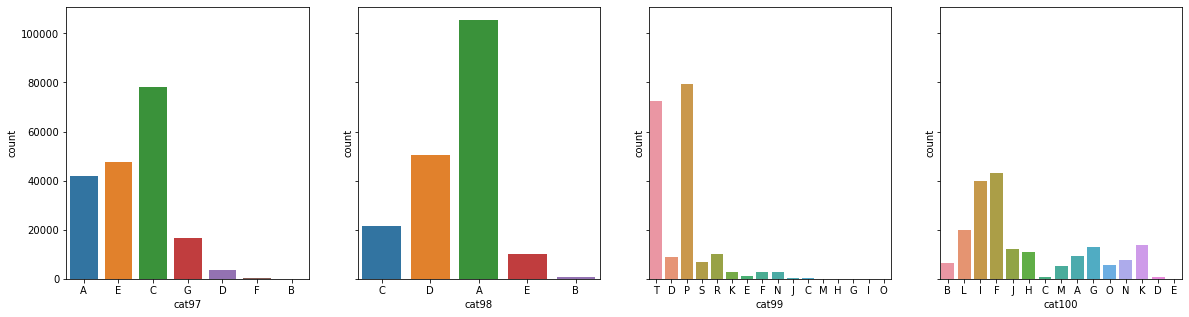

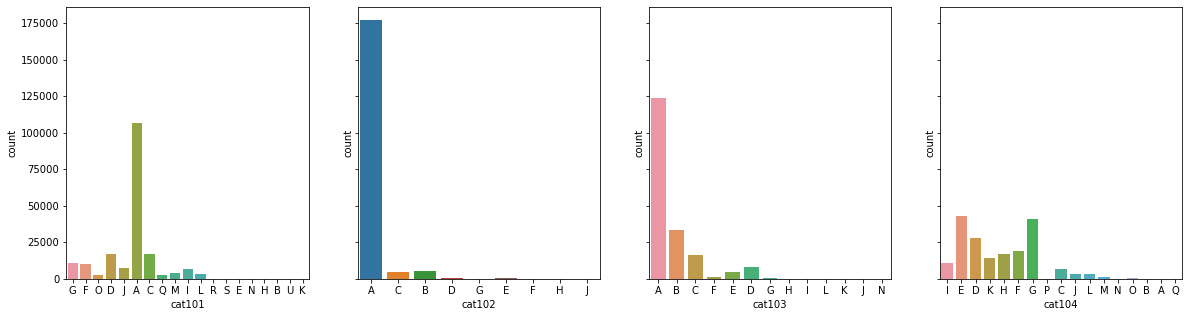

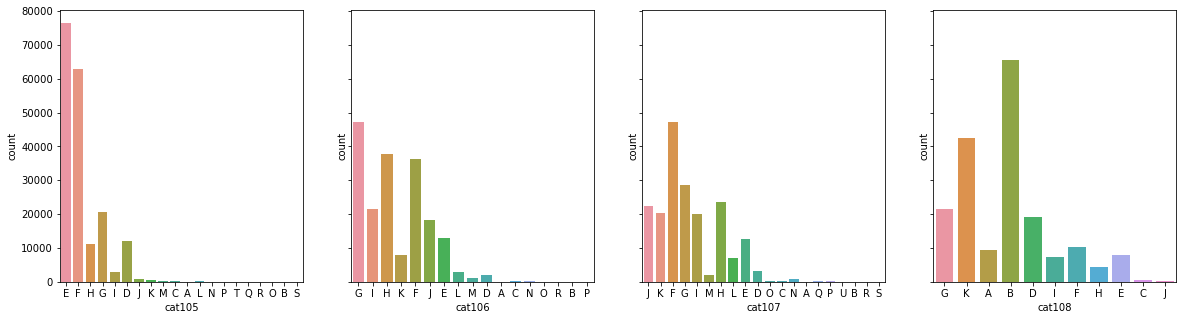

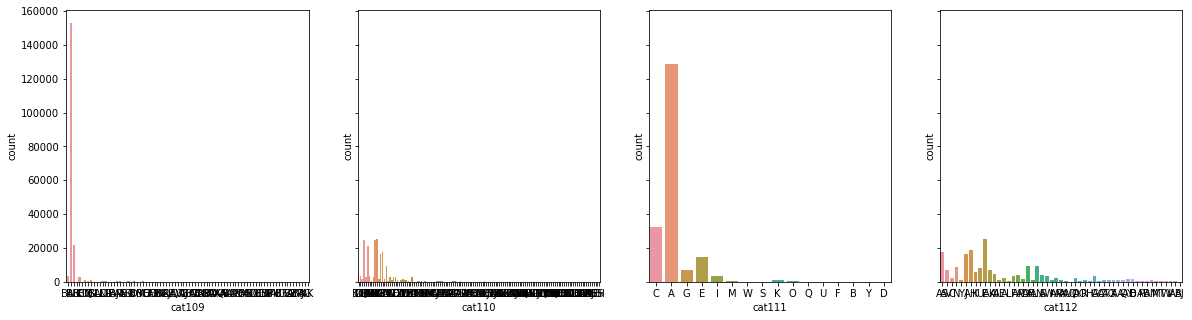

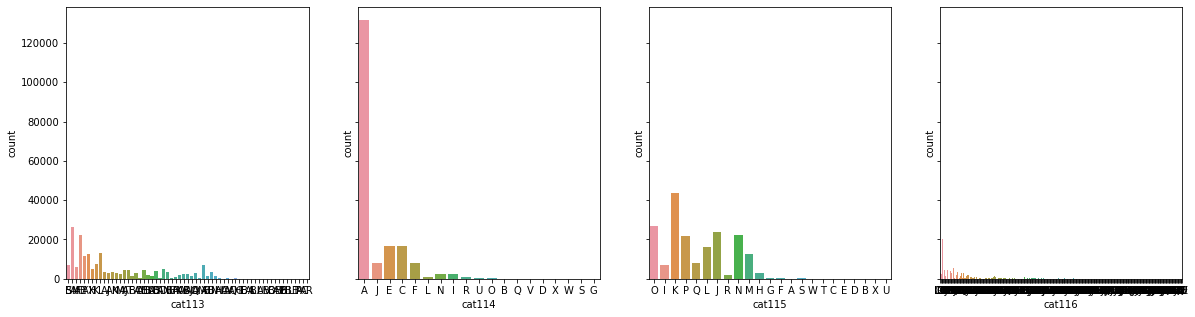

In [174]:
n_rows = 29
n_cols = 4
for i in range(n_rows):
    fig,ax = plt.subplots(nrows = 1, ncols = n_cols, figsize = (20,5), sharey = True)
    for j in range(n_cols):
        cat_col = col_name[i*4+(j+1)]
        sns.countplot(x = df_train[cat_col], ax = ax[j])

### Convert categorical value to numeric value

In [177]:
for col in col_name[1:117]:
    le = LabelEncoder()
    le.fit(df_train[col].unique())
    df_train[col] = le.transform(df_train[col])

In [178]:
df_train.head(5)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,0,1,0,1,0,0,0,0,1,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,0,1,0,0,0,0,0,0,1,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,0,1,0,0,1,0,0,0,1,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,1,1,0,1,0,0,0,0,1,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,0,1,0,1,0,0,0,0,1,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [180]:
df_train.shape

(188318, 132)

In [185]:
df_train_cat = df_train.iloc[:,1:117]

In [186]:
df_train_cat.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
0,0,1,0,1,0,0,0,0,1,0,...,9,6,45,28,2,19,55,0,14,269
1,0,1,0,0,0,0,0,0,1,1,...,10,10,33,65,0,22,38,0,14,85
2,0,1,0,0,1,0,0,0,1,1,...,5,0,2,85,0,28,5,0,8,153
3,1,1,0,1,0,0,0,0,1,0,...,10,10,33,67,2,39,4,0,14,79
4,0,1,0,1,0,0,0,0,1,1,...,6,1,66,50,2,50,38,0,10,55


In [225]:
df_train_cat['loss'] = df_train.iloc[:,-1]

In [226]:
df_train_cat.corr()['loss'].abs().sort_values()

cat70     0.000320
cat107    0.000509
cat93     0.001176
cat15     0.001800
cat92     0.004339
            ...   
cat87     0.346311
cat101    0.352646
cat79     0.441172
cat80     0.473257
loss      1.000000
Name: loss, Length: 117, dtype: float64

cat70 and cat107 has correlation with loss < 0.001

In [232]:
df_train_cat = df_train_cat.drop(['cat70','cat107','loss'],axis = 1)

## Numeric Value

In [196]:
df_train_con = df_train.iloc[:,117:]

In [197]:
df_train_con.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


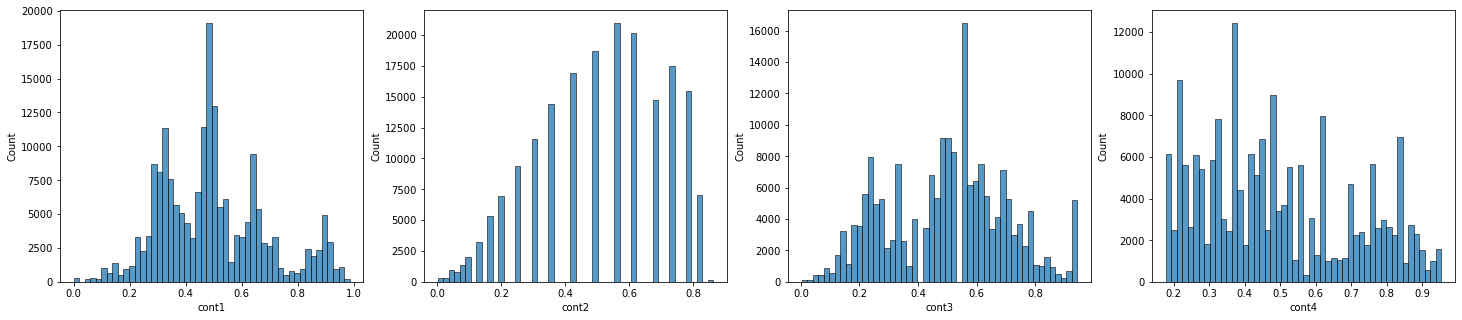

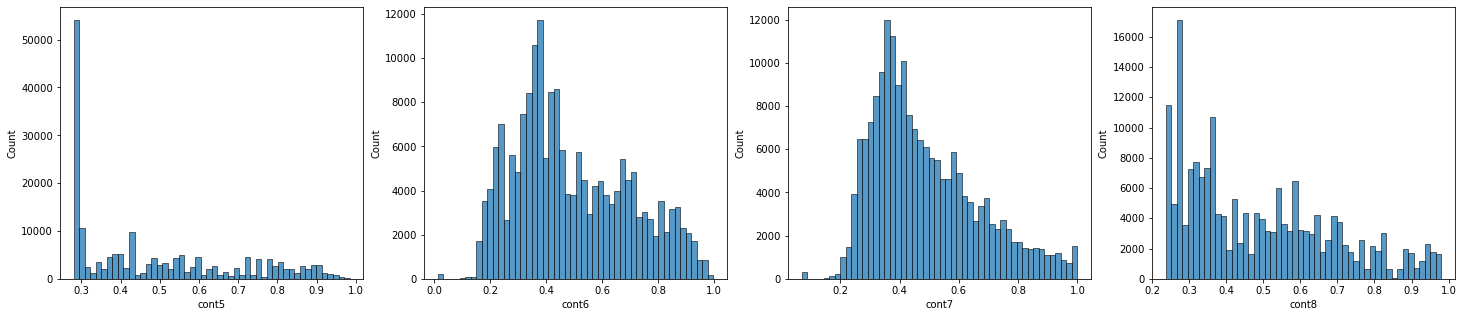

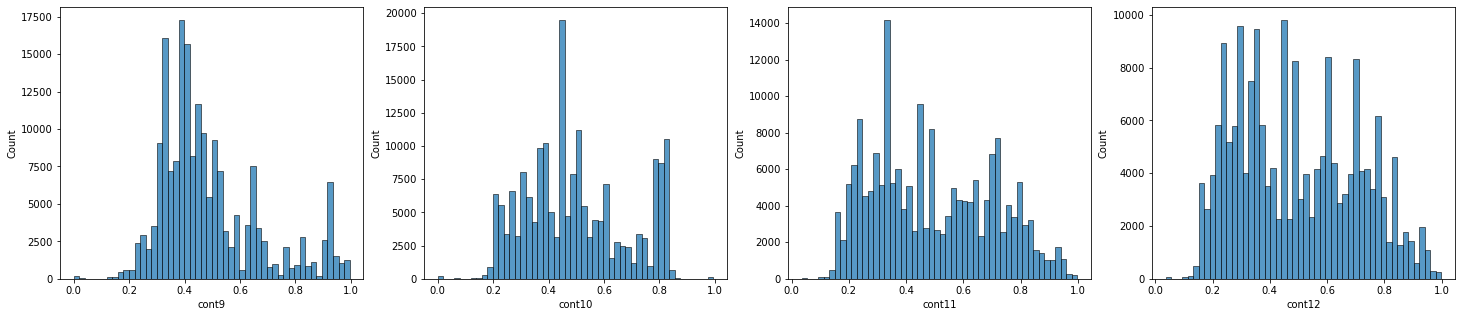

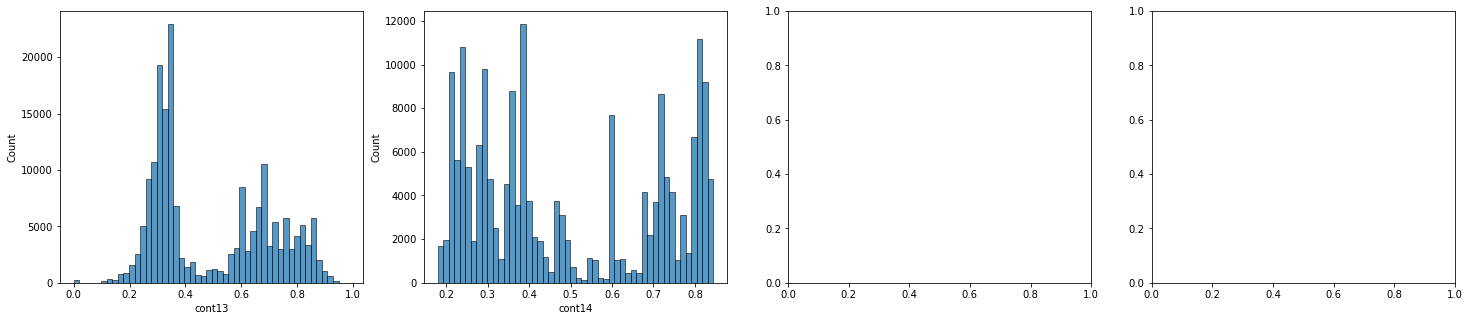

In [190]:
n_rows = 4
n_cols = 4
for i in range(n_rows):
    fig,ax = plt.subplots(nrows = 1, ncols = n_cols, figsize = (25,5))
    for j in range(n_cols):
        if i*n_cols+(j+1)<15:
            cont_col = col_name[116+(i*n_cols+(j+1))]
            sns.histplot(x = df_train[cont_col], bins = 50, ax = ax[j])

<AxesSubplot:>

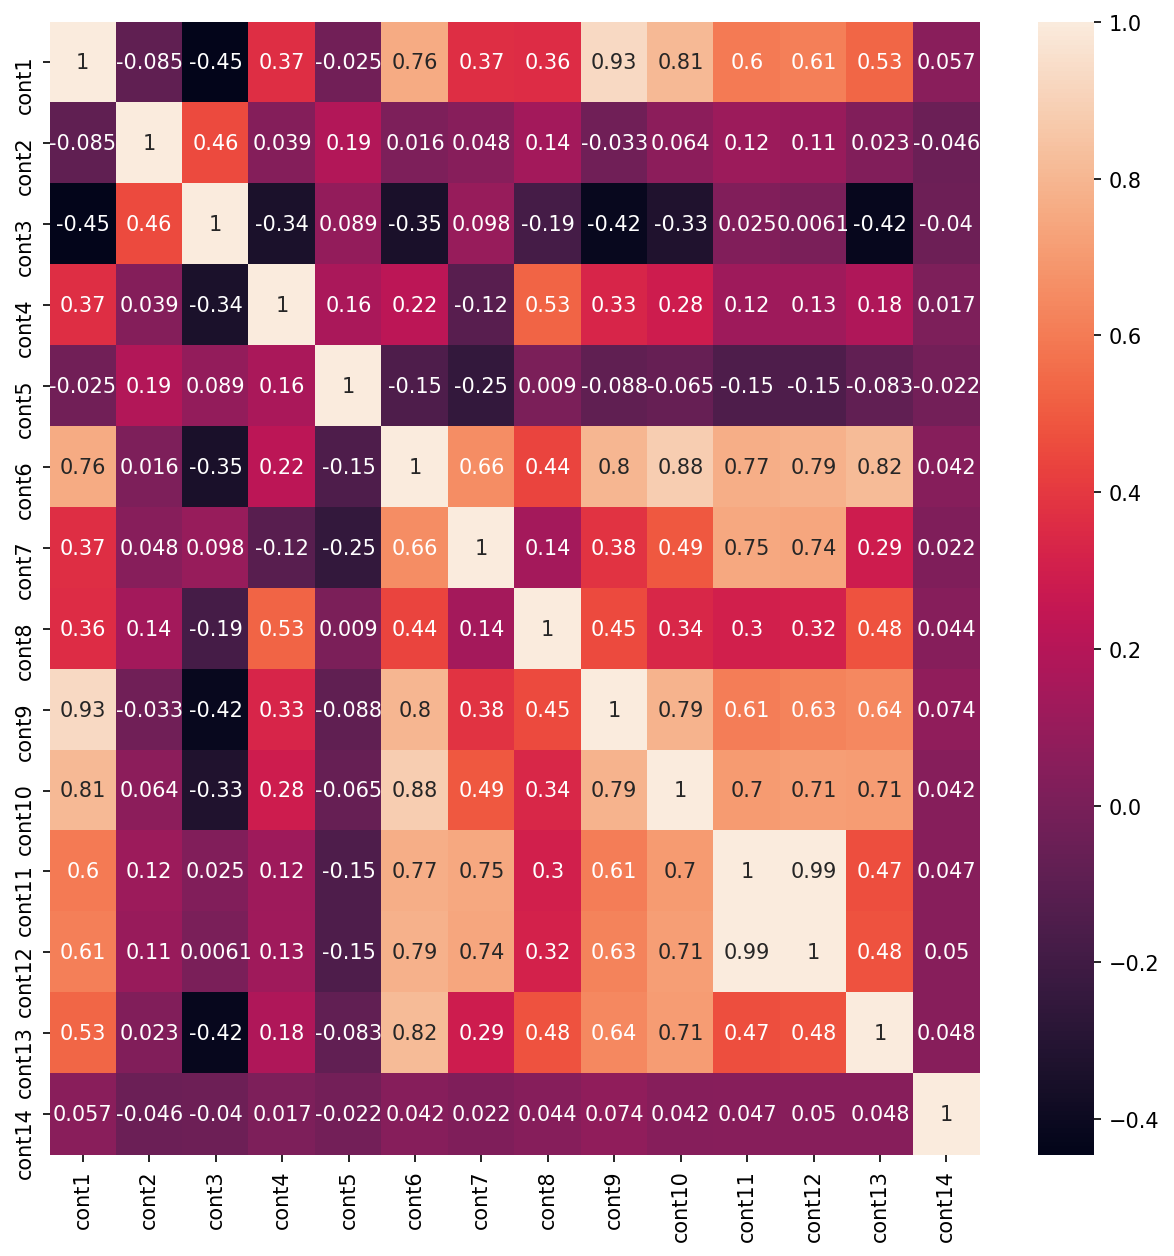

In [199]:
fig = plt.figure(figsize = (10,10), dpi = 150)
sns.heatmap(df_train_con.drop('loss',axis=1).corr(), annot = True)

In [200]:
df_train_con.corr()['loss'].abs().sort_values()

cont13    0.004022
cont1     0.010237
cont5     0.011355
cont9     0.014456
cont14    0.019298
cont10    0.020236
cont8     0.030508
cont4     0.035831
cont6     0.040967
cont12    0.098724
cont11    0.099806
cont3     0.111053
cont7     0.119799
cont2     0.141528
loss      1.000000
Name: loss, dtype: float64

correlation between cont13 and loss < 0.01

In [201]:
df_train_con = df_train_con.drop('cont13',axis = 1)

In [233]:
final_train = pd.concat([df_train_cat,df_train_con],axis=1)
final_train.shape

(188318, 128)

In [203]:
final_train.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont14,loss
0,0,1,0,1,0,0,0,0,1,0,...,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.714843,2213.18
1,0,1,0,0,0,0,0,0,1,1,...,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.304496,1283.60
2,0,1,0,0,1,0,0,0,1,1,...,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.774425,3005.09
3,1,1,0,1,0,0,0,0,1,0,...,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.602642,939.85
4,0,1,0,1,0,0,0,0,1,1,...,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.432606,2763.85


In [219]:
for col in col_name[1:117]:
    le = LabelEncoder()
    le.fit(df_test[col].unique())
    df_test[col] = le.transform(df_test[col])

In [274]:
final_test = df_test.drop(['id','cont13','cat70','cat107'],axis= 1)
final_test.head(5)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont14
0,0,1,0,0,0,0,0,0,1,0,...,0.402922,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.392562
1,0,1,0,1,0,0,0,0,1,0,...,0.946616,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.208045
2,0,1,0,1,1,0,1,0,1,1,...,0.412789,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.297232
3,0,0,0,0,1,0,0,0,0,0,...,0.354893,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.555955
4,1,0,0,0,0,1,0,0,0,0,...,0.696873,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.825823


## modeling

In [275]:
X_train = final_train.drop('loss', axis = 1)
y_train = final_train['loss']

X_test = final_test

## LinearRegression

In [252]:
lin_model = LinearRegression()

In [253]:
scores = cross_val_score(lin_model,X_train,y_train,
                         scoring='neg_mean_absolute_error',cv=5)

In [254]:
scores

array([-1335.66575891, -1322.28926052, -1330.91946699, -1338.6498273 ,
       -1326.94434391])

In [255]:
abs(scores.mean())

1330.893731524477

In [256]:
abs(scores).min()

1322.2892605188422

The best MAE of the linear regression model is 1322

## Ridge

In [265]:
alphas = [1,10,100]

for alpha in alphas:
    
    ridge_model = Ridge(alpha)
    
    scores = cross_val_score(ridge_model,X_train,y_train,
                         scoring='neg_mean_absolute_error',cv=5)
    print(scores)

[-1335.59569422 -1322.17920115 -1330.90331055 -1338.64326559
 -1326.92640792]
[-1335.45779518 -1322.02635427 -1330.74461667 -1338.50901858
 -1326.73157875]
[-1334.74356823 -1321.23565729 -1329.83089993 -1337.75572936
 -1325.57424766]


The best MAE of the Ridge model is 1321

## DecisionTree

In [257]:
dt_model = DecisionTreeRegressor()

In [258]:
scores = cross_val_score(dt_model,X_train,y_train,
                         scoring='neg_mean_absolute_error',cv=5)

In [259]:
scores

array([-1749.53357503, -1756.63671304, -1757.32204333, -1761.59321775,
       -1739.22701697])

The best MAE of the DecisionTree model is 1739

## RandomForest

In [263]:
trees = [10,50,100]
for n in trees:

    rf_model = RandomForestRegressor(n_estimators=n)
    
    scores = cross_val_score(rf_model,X_train,y_train,
                         scoring='neg_mean_absolute_error',cv=5)
    print(scores)

[-1321.14364744 -1308.95710671 -1315.93220072 -1321.86136591
 -1302.0559484 ]
[-1261.13573914 -1249.10700234 -1259.33885542 -1262.03197351
 -1252.23751501]
[-1256.50670444 -1243.90192046 -1255.00639193 -1259.37019289
 -1244.33042577]


The best MAE of the Random Forest model is 1244 with n_estimators = 100.

## Prediction

In [269]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

RandomForestRegressor()

In [276]:
test_pred = model.predict(X_test)

In [288]:
pred = pd.DataFrame(test_pred,df_test['id'],columns = ['loss'])

In [289]:
pred

,loss
id,
4,1957.5359
6,2320.3555
9,9584.6912
12,6243.3551
15,752.7510
...,...
587617,2418.7808
587621,2941.0228
587627,3855.5477
